In [13]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

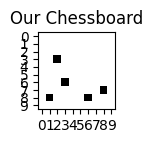

In [113]:
# some setup

# NxN lattice
N = 10
# M sites on the lattice are occupied by a piece (randomly)
M = 5

start_pos = (0, 0)
num_steps = 100

# the possible moves are the moves the walker can take if it is not going to eat something.
possible_moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

#setting up the lattice
lattice = np.zeros((N, N), dtype=int)
flat_indices = np.random.choice(N*N, M, replace=False)
rows = flat_indices // N
cols = flat_indices % N
lattice[rows, cols] = 1
#make the figure bigger if you like
plt.figure(figsize=(1, 1))
plt.imshow(lattice, cmap='Greys', origin='upper')
plt.title(f'Our Chessboard')
plt.xticks(np.arange(N))
plt.yticks(np.arange(N))
plt.show()
simulation_lattice = copy.deepcopy(lattice)

In [114]:
def get_next_move(current_pos, simulation_lattice, N, possible_moves):
    current_r, current_c = current_pos
    diagonal_moves_only = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

    occupied_diagonal_targets = []
    for dr, dc in diagonal_moves_only:
        next_r, next_c = current_r + dr, current_c + dc
        # is the next position within the lattice bounds?
        if 0 <= next_r < N and 0 <= next_c < N:
            # is the diagonal target site occupied?
            if simulation_lattice[next_r, next_c] == 1:
                occupied_diagonal_targets.append((next_r, next_c))

    next_pos = None
    move_was_jump = False

    # If possible, jump to a diagonally adjacent occupied site
    if occupied_diagonal_targets:
        next_pos = random.choice(occupied_diagonal_targets)
        # it is a jump because it was a diagonal move, eating the target
        move_was_jump = True
    else:
        # Otherwise it moves to any random valid adjacent (up/down/left/right) site
        # but it can not move to an occupied site! A pawn can only eat diagonally
        all_valid_targets = []
        for dr, dc in possible_moves:
            next_r, next_c = current_r + dr, current_c + dc
            if 0 <= next_r < N and 0 <= next_c < N:
                if simulation_lattice[next_r, next_c] == 0:
                    all_valid_targets.append((next_r, next_c))
        if not all_valid_targets:
            # just in case, if there are no valid moves
            print("The poor walker is trapped!")
            return current_pos

        next_pos = random.choice(all_valid_targets)
        move_was_jump = False
    # 'jumped to' refers to the action of moving to an occupied diagonal, Effectively eating it
    return next_pos, move_was_jump

In [115]:
path = [start_pos]
current_pos = start_pos
m_counter = M

for step in range(num_steps):
    next_pos, move_was_jump = get_next_move(current_pos, simulation_lattice, N, possible_moves)
    current_pos = next_pos
    if move_was_jump:
        simulation_lattice[current_pos] = 0
        m_counter -= 1
    if m_counter == 0:
        print("The walker has eaten all the pieces!")
        print('Done after', {step}, 'steps')
        break
    path.append(current_pos)

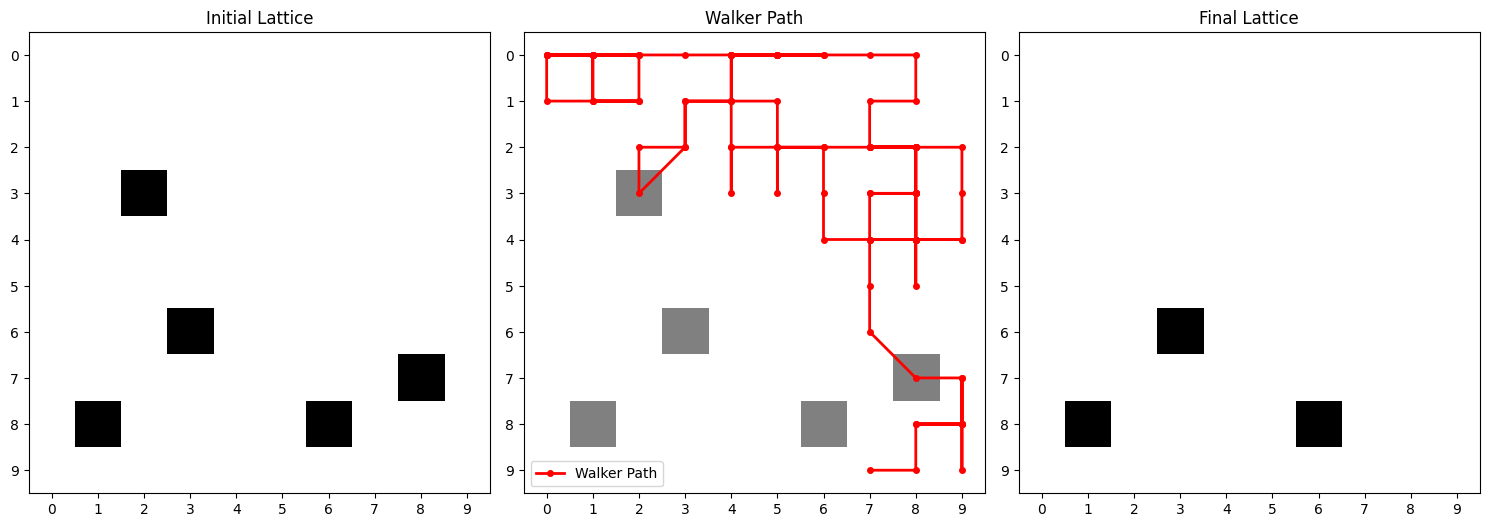

In [116]:
plt.figure(figsize=(15, 5))

#Initial Lattice
plt.subplot(1, 3, 1)
plt.imshow(lattice, cmap='Greys', origin='upper')
plt.title('Initial Lattice')
plt.xticks(np.arange(N))
plt.yticks(np.arange(N))

#Walker Path
plt.subplot(1, 3, 2)
plt.imshow(lattice, cmap='Greys', origin='upper', alpha=0.5)
path_rows = [p[0] for p in path]
path_cols = [p[1] for p in path]
plt.plot(path_cols, path_rows, color='red', linewidth=2, marker='o', markersize=4, label='Walker Path')
plt.title('Walker Path')
plt.xticks(np.arange(N))
plt.yticks(np.arange(N))
plt.legend()

#Final Lattice
plt.subplot(1, 3, 3)
plt.imshow(simulation_lattice, cmap='Greys', origin='upper')
plt.title('Final Lattice')
plt.xticks(np.arange(N))
plt.yticks(np.arange(N))

plt.tight_layout()
plt.show()